In [1]:
import json
from keras.models import load_model
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
import collections

In [2]:
# Read the files word_to_idx.pkl and idx_to_word.pkl to get the mapping between word and index
word_to_index = {}
with open ("data/textFiles/word_to_idx.pkl", 'rb') as file:
    word_to_index = pd.read_pickle(file)

index_to_word = {}
with open ("data/textFiles/idx_to_word.pkl", 'rb') as file:
    index_to_word = pd.read_pickle(file)

print("Loading the model...")
model = load_model('model_checkpoints/model_19.h5')

Loading the model...


In [3]:
test_encoding = {}
with open("encoded_test_features.pkl", "rb") as file:
    test_encoding = pd.read_pickle(file)

print(test_encoding)

{'3385593926_d3e9c21170': array([0.3331689 , 0.38347757, 0.0725344 , ..., 0.90832144, 0.35600552,
       1.0914084 ], dtype=float32), '2677656448_6b7e7702af': array([0.2944201 , 0.09479219, 0.7021817 , ..., 0.0198706 , 0.2909237 ,
       0.10954218], dtype=float32), '311146855_0b65fdb169': array([0.01134305, 0.08777487, 0.14328413, ..., 0.03006493, 1.1856283 ,
       0.06956831], dtype=float32), '1258913059_07c613f7ff': array([0.04770138, 1.4354631 , 0.10770525, ..., 0.13343851, 0.11505935,
       2.0496502 ], dtype=float32), '241347760_d44c8d3a01': array([0.06552811, 6.6828294 , 0.31763434, ..., 0.06200404, 0.03742842,
       0.04522504], dtype=float32), '2654514044_a70a6e2c21': array([1.9562042 , 0.04316799, 0.1114384 , ..., 0.02008313, 0.6832548 ,
       0.4329413 ], dtype=float32), '2339106348_2df90aa6a9': array([0.08876347, 1.192791  , 0.07676528, ..., 0.01899937, 0.13417557,
       0.13799469], dtype=float32), '256085101_2c2617c5d0': array([0.61918086, 0.5904774 , 0.03345924, ...

In [4]:
# Generate Captions for a random image in test dataset
def predict_caption(photo):

    inp_text = "startseq"

    for i in range(38):
        sequence = [word_to_index[w] for w in inp_text.split() if w in word_to_index]
        sequence = pad_sequences([sequence], maxlen=38, padding='post')

        ypred = model.predict([photo, sequence])
        ypred = ypred.argmax()
        word = index_to_word[ypred]

        inp_text += (' ' + word)

        if word == 'endseq':
            break

    final_caption = inp_text.split()[1:-1]
    final_caption = ' '.join(final_caption)
    return final_caption

Running model to genrate the caption...
1/1 [==============================] - 0s 19ms/step
a man and a woman are standing on a bench


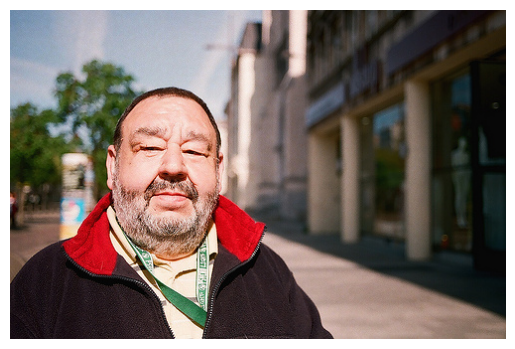

In [6]:
all_img_IDs = list(test_encoding.keys())

# Get a random image
number = np.random.randint(0, len(test_encoding))
img_ID = all_img_IDs[int(number)]
photo = test_encoding[img_ID].reshape((1, 2048))

print("Running model to genrate the caption...")
caption = predict_caption(photo)

img_data = plt.imread("data/Images/" + img_ID + ".jpg")
plt.imshow(img_data)
plt.axis("off")
print(caption)
plt.show()
# print(caption)
